In [3]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['Microsoft YaHei']

movies = pd.read_csv('./数据源/movies.csv')
ratings = pd.read_csv('./数据源/ratings.csv')

#a)处理电影数据，仅保留电影ID、电影名称、主演、导演、类型、制片国家/地区、语言、上映日期、标签字段。

In [4]:
movies = movies[['MOVIE_ID','NAME','ACTORS','DIRECTORS','GENRES','REGIONS','LANGUAGES','RELEASE_DATE','TAGS']]
movies

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,NaN,NaN
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,NaN,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013-03-30,百合/日本电影/日本/Les/同性/情色/2013/电影
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009-01-29,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,NaN,NaN
...,...,...,...,...,...,...,...,...,...
42146,5056062,The Man Who Had Power Over Women,NaN,NaN,喜剧,英国,英语,NaN,被忽视的片子/White/Carol
42147,26434999,奇妙的朋友之萌爱 - 电影,杜海涛/郭艳/高泰宇/姜潮/谢彬彬/林雪/刘心/宁小花/温超/武艺/杨晶,张全欣,剧情/喜剧,中国大陆,汉语普通话,NaN,萌爱/滚出电影圈/温情/中国/2016/综艺IP/黄轩/送走“欢乐颂”
42148,2132349,L'allenatore nel pallone,丽奇妮娅·伦蒂尼,NaN,喜剧/运动,意大利,意大利语,1984-10-26,意大利/意大利电影/足球/喜剧/1980s/PIppo
42149,1306389,戴茜·克洛弗的内心,娜塔莉·伍德/克里斯托弗·普卢默/罗伯特·雷德福,罗伯特·马利根,剧情/爱情/歌舞,美国,英语,1966-02-17,美国/NatalieWood/RobertRedford/1966/1960s/美国电影/剧...


#b)查看数据的缺失值情况

In [5]:
movies.isnull()

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS
0,False,False,True,True,False,False,False,True,True
1,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False
3,False,False,True,True,False,False,False,False,False
4,False,False,False,True,False,False,False,True,True
...,...,...,...,...,...,...,...,...,...
42146,False,False,True,True,False,False,False,True,False
42147,False,False,False,False,False,False,False,True,False
42148,False,False,False,True,False,False,False,False,False
42149,False,False,False,False,False,False,False,False,False


#c)查看数据的重复情况

In [6]:
movies[movies.duplicated() == True]

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS


#d)根据上映日期，提取电影上映年份数据，缺失值使用1970填充。

In [7]:
movies['RELEASE_DATE'] = movies['RELEASE_DATE'].fillna("1970") 
movies.head()

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,1970,NaN
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,1970,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013-03-30,百合/日本电影/日本/Les/同性/情色/2013/电影
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009-01-29,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,1970,NaN


In [8]:
movies['RELEASE_DATE'] = pd.to_datetime(movies['RELEASE_DATE'], format='mixed') #将上映日期转换为datetime格式
movies['RELEASE_DATE'] = movies['RELEASE_DATE'].dt.strftime('%Y') #规定上映日期的格式为只显示年份
movies.head()

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,1970,NaN
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,1970,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013,百合/日本电影/日本/Les/同性/情色/2013/电影
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,1970,NaN


In [9]:
movie_ratings = ratings.groupby('MOVIE_ID')['RATING'].mean().reset_index(name='评分')
movies = pd.merge(movies, movie_ratings, on='MOVIE_ID', how='left')
movies.head()

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS,评分
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,1970,NaN,NaN
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,1970,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻,4.75
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013,百合/日本电影/日本/Les/同性/情色/2013/电影,2.00
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009,3.50
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,1970,NaN,NaN


In [10]:
num_ratings = ratings.groupby('MOVIE_ID').size().reset_index(name='评分人数')
movies = pd.merge(movies, num_ratings, on='MOVIE_ID', how='left')
movies.head()

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS,评分,评分人数
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,1970,NaN,NaN,NaN
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,1970,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻,4.75,4.0
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013,百合/日本电影/日本/Les/同性/情色/2013/电影,2.00,14.0
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009,3.50,32.0
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,1970,NaN,NaN,NaN


In [11]:
mean_rating = round(ratings['RATING'].mean(),1)
movies['评分'][movies['评分'].isnull()] = mean_rating
movies['评分'] = round(movies['评分'],1)
movies['评分人数'].fillna(0, inplace=True)

C:\Users\林梓聪\AppData\Local\Temp\ipykernel_44996\3847928139.py:2: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  movies['评分'][movies['评分'].isnull()] = mean_rating
C:\Users\林梓聪\AppData\Local\Temp\ipykernel_44996\3847928139.py:2: SettingWithCopy

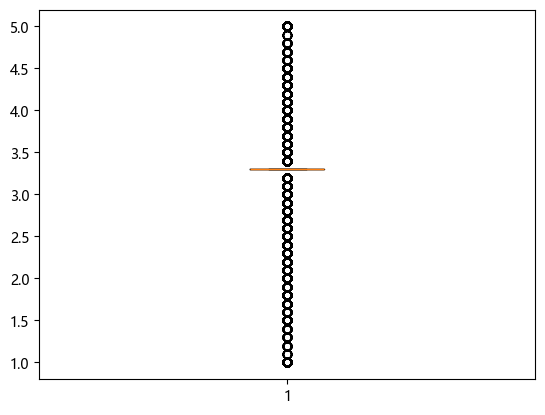

In [12]:
plt.boxplot(movies['评分'])
plt.show()

In [13]:
movies

,MOVIE_ID,NAME,ACTORS,DIRECTORS,GENRES,REGIONS,LANGUAGES,RELEASE_DATE,TAGS,评分,评分人数
0,5068488,Clandestine,NaN,NaN,剧情/战争,法国,法语,1970,NaN,3.3,0.0
1,26830049,异类,高瀚宇/赵婉婷/维妮,朱睿/郑继宗,剧情/动作/爱情/科幻/惊悚/奇幻,中国大陆,汉语普通话,1970,高颜值/特效/惊悚/很赞/中国电影/解决/朱睿/暗黑魔幻,4.8,4.0
2,21365967,被炉、蜜桔和小猫,木岛法子/福见真纪/镰田纮子,梶野龟太郎,剧情,日本,日语,2013,百合/日本电影/日本/Les/同性/情色/2013/电影,2.0,14.0
3,3733985,烈焰篮球 - 电影,NaN,NaN,剧情/动作,泰国,泰语,2009,泰国/动作/泰国、动作、暴力、篮球/泰国电影/篮球/跑酷/泰國動作片/2009,3.5,32.0
4,5049839,Liebe Melanie - 电影,森塔·贝格尔,NaN,剧情,德国,德语,1970,NaN,3.3,0.0
...,...,...,...,...,...,...,...,...,...,...,...
42146,5056062,The Man Who Had Power Over Women,NaN,NaN,喜剧,英国,英语,1970,被忽视的片子/White/Carol,3.3,0.0
42147,26434999,奇妙的朋友之萌爱 - 电影,杜海涛/郭艳/高泰宇/姜潮/谢彬彬/林雪/刘心/宁小花/温超/武艺/杨晶,张全欣,剧情/喜剧,中国大陆,汉语普通话,1970,萌爱/滚出电影圈/温情/中国/2016/综艺IP/黄轩/送走“欢乐颂”,3.3,0.0
42148,2132349,L'allenatore nel pallone,丽奇妮娅·伦蒂尼,NaN,喜剧/运动,意大利,意大利语,1984,意大利/意大利电影/足球/喜剧/1980s/PIppo,3.3,0.0
42149,1306389,戴茜·克洛弗的内心,娜塔莉·伍德/克里斯托弗·普卢默/罗伯特·雷德福,罗伯特·马利根,剧情/爱情/歌舞,美国,英语,1966,美国/NatalieWood/RobertRedford/1966/1960s/美国电影/剧...,3.2,16.0


In [14]:
std_deviation = ratings['RATING'].std()
low_std_movies = movies[movies['评分'] < mean_rating - 2 * std_deviation]
high_std_movies = movies[movies['评分'] > mean_rating + 2 * std_deviation]
print("评分低于2个标准差的电影信息：")
print(low_std_movies.head())
print("\n评分高于2个标准差的电影信息：")
print(high_std_movies.head())

评分低于2个标准差的电影信息：
      MOVIE_ID       NAME              ACTORS DIRECTORS    GENRES REGIONS  \
73     5152790  Bloodless                 NaN       NaN        恐怖      英国   
379   26133294      山村姑娘2  杨易之/朱琦雯/侯辉辉/乔鹏樾/武雁       杨易之        剧情    中国大陆   
1014  26842811      变态回忆录             郭子溪/罗立群       童小辉     悬疑/惊悚    中国大陆   
1071  30289998  特种部队：人体武器                 NaN       NaN  剧情/动作/科幻      美国   
1587  23853445       二氧化碳                 NaN       NaN  剧情/动作/冒险      美国   

     LANGUAGES RELEASE_DATE                             TAGS   评分  评分人数  
73          英语         1970                       英国/恐怖/国外电影  1.0   1.0  
379      汉语普通话         2014     中国/想看/网络电影/山村姑娘/烂片/2014/差/大陆  1.0   6.0  
1014     汉语普通话         2016            惊悚/变态/细思极恐/烧脑/双重人格/中国  1.0   1.0  
1071        英语         2018                         渣演技/五毛特效  1.0   3.0  
1587        英语         2010  美国/灾难/美国电影/科幻/化学/Robert_Bresson  1.0   3.0  

评分高于2个标准差的电影信息：
Empty DataFrame
Columns: [MOVIE_ID, NAME, ACTORS, DIRECTORS,

In [15]:
# 将类型数据拆分并展开成单行形式
genre_ratings = movies['GENRES'].str.split('/', expand=True).stack().reset_index(level=1, drop=True).to_frame('genre')
#使用merge函数将处理好的类型数据合并到movies中
genre_ratings = pd.merge(genre_ratings, movies[['MOVIE_ID', '评分']], left_index=True, right_index=True)
#通过不同类型计算平均评分
genre_avg_ratings = genre_ratings.groupby('genre')['评分'].mean()
genre_avg_ratings
print(genre_avg_ratings)

genre
Adult              3.032353
News               3.300000
Reality-TV         2.933333
传记                 3.466232
傳記 Biography       3.900000
儿童                 3.409664
兒童 Kids            3.550000
冒险                 3.261567
剧情                 3.335714
劇情 Drama           3.400000
动作                 3.176765
动画                 3.448898
動作 Action          3.300000
動畫 Animation       3.316667
历史                 3.446098
古装                 3.175550
同性                 3.292489
喜剧                 3.309490
喜劇 Comedy          3.800000
奇幻                 3.248327
家庭                 3.422629
恐怖                 3.040881
悬念                 3.460000
悬疑                 3.216293
情色                 3.188350
惊悚                 3.118595
惊栗                 3.184615
愛情 Romance         3.800000
懸疑 Mystery         3.300000
戏曲                 3.626374
战争                 3.360383
歌舞                 3.410178
武侠                 3.224370
歷史 History         3.900000
灾难                 3.132836
爱情            

In [16]:
plt.figure(figsize=(18, 10))
country_avg_ratings.plot(kind='bar')
plt.grid(True)
plt.show()

NameError: name 'country_avg_ratings' is not defined

<Figure size 1800x1000 with 0 Axes>

In [1030]:
# 将国家数据拆分
movies['REGIONS'] = movies['REGIONS'].str.split('/').explode('REGIONS')
movies['REGIONS'] = movies['REGIONS'].str.strip()
# 计算每个国家的电影数量
num_countries = movies.groupby('REGIONS')['MOVIE_ID'].count()
# 过滤出电影数量大于1的国家数量
movies_with_multiple_countries = num_countries[num_countries > 50].keys()
movies = movies[movies['REGIONS'].isin(movies_with_multiple_countries)]
#使用merge函数将处理好的类型数据合并到movies中
#country_ratings = pd.merge(movies_with_multiple_countries, movies[['MOVIE_ID', '评分']], left_index=True, right_index=True)
#通过不同国家计算平均评分
country_avg_ratings = movies.groupby('REGIONS')['评分'].mean()
print(country_avg_ratings.head())

REGIONS
中国台湾    3.229791
中国大陆    3.283429
中国香港    3.294668
丹麦      3.257098
伊朗      3.167066
Name: 评分, dtype: float64


In [1033]:
# 通过不同年份计算平均评分
year_avg_ratings = movies.groupby('RELEASE_DATE')['评分'].mean()
print(year_avg_ratings)

RELEASE_DATE
1908    3.300
1910    5.000
1912    3.300
1913    3.575
1914    3.340
        ...  
2022    3.300
2023    3.300
2024    3.300
2026    3.300
2027    3.300
Name: 评分, Length: 117, dtype: float64


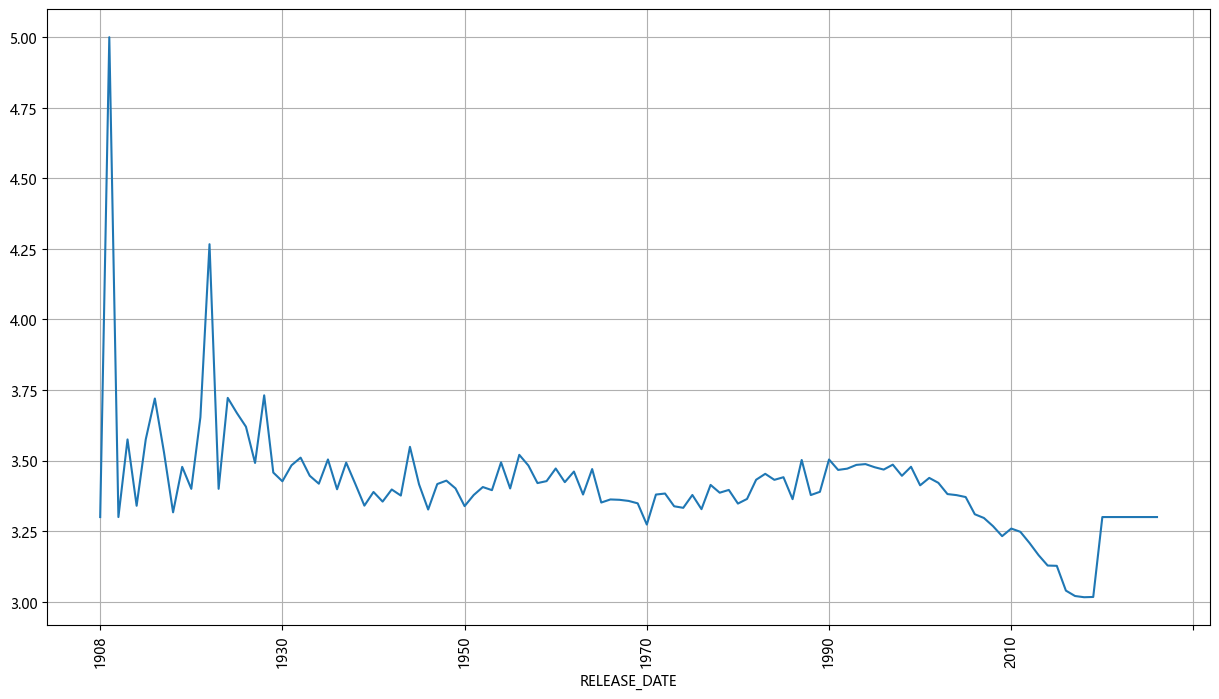

In [1055]:
plt.figure(figsize=(15, 8))
year_avg_ratings.plot()
plt.xticks(rotation=90)
plt.grid(True)
plt.show()

In [27]:
# 将国家数据拆分
country_counts = movies['REGIONS'].str.split('/', expand=True).stack().value_counts()
print(country_counts)

美国           11029
中国大陆          4242
日本            4134
英国            2401
法国            2277
             ...  
Croatia          1
 Israel          1
 Croatia         1
Cameroon         1
 台湾              1
Name: count, Length: 607, dtype: int64


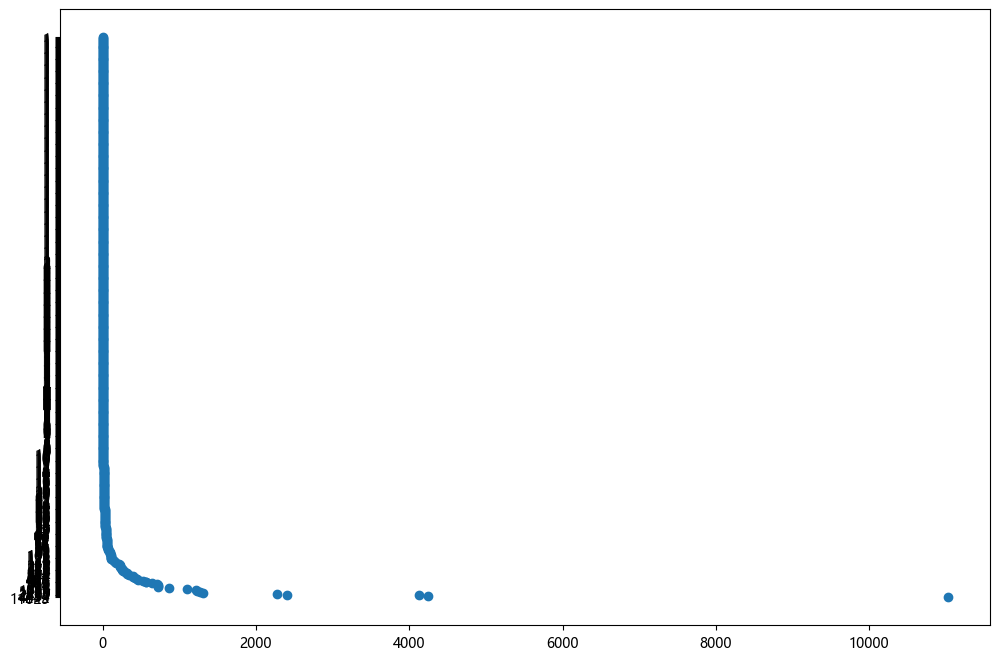

In [29]:
plt.figure(figsize=(12, 8))
plt.plot(country_counts, country_counts.index, 'o')
plt.yticks(country_counts.index,country_counts)
plt.show()

In [1107]:
#计算不同年份电影的数量
year_counts = movies['RELEASE_DATE'].value_counts().sort_index()
print(year_counts)

RELEASE_DATE
1908    1
1910    1
1912    1
1913    8
1914    5
       ..
2022    4
2023    1
2024    2
2026    1
2027    1
Name: count, Length: 117, dtype: int64


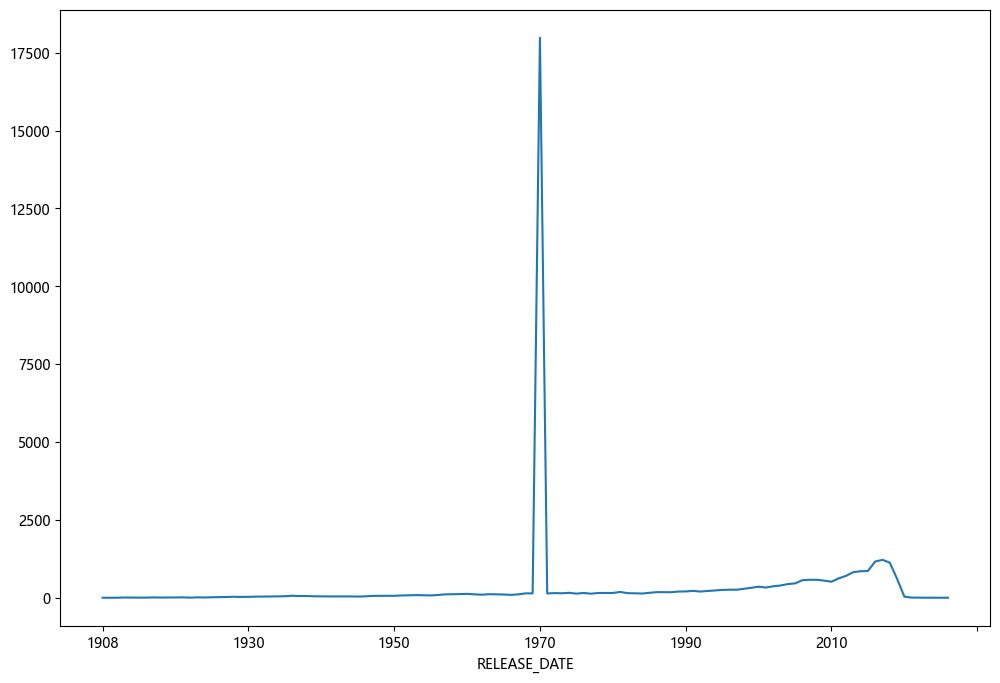

In [1109]:
plt.figure(figsize=(12, 8))
year_counts.plot()
# x_label = ['1920','1940','1960','1980','2000','2020']
# plt.xticks([year_counts.index.get_loc(year) for year in x_label],x_label,rotation=90)
plt.show()

In [68]:
#将电影数据中的类型以'/'分隔,通过迭代器，迭代成每一种类型，然后计算每个数据的数量
genres_counts = movies['GENRES'].str.split('/', expand=True).stack().value_counts()
# 计算占比
genres_percentage = genres_counts / genres_counts.sum() * 100
print(genres_percentage.head())

剧情    25.271537
喜剧    13.014508
爱情     8.587752
动作     8.128129
惊悚     6.379510
Name: count, dtype: float64


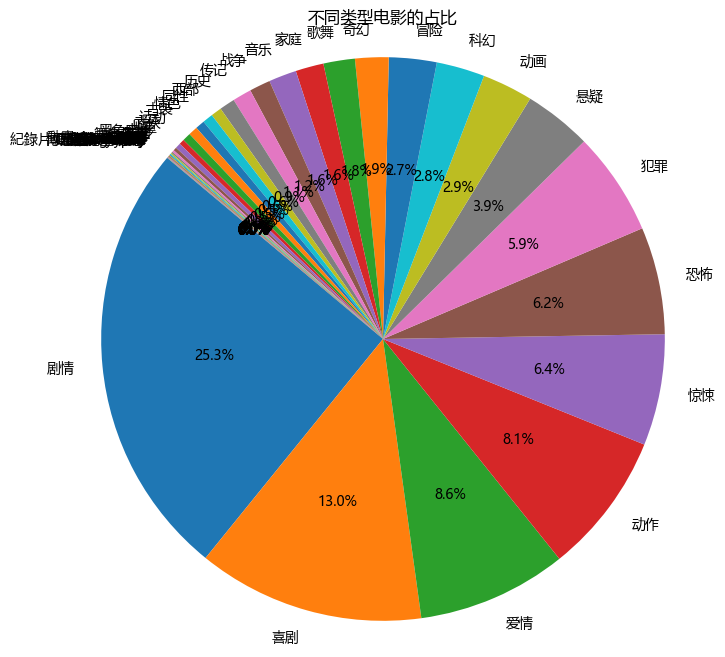

In [70]:
plt.figure(figsize=(8, 8))
plt.pie(genres_percentage, labels=genres_percentage.index, autopct='%1.1f%%', startangle=140)
plt.title('不同类型电影的占比')
plt.axis('equal')  # 保证饼图是圆形的
plt.show()